# Pneumonia Detection using CNN

### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Preprocessing

In [2]:
train_path = './Dataset/chest_xray/train'
test_path = './Dataset/chest_xray/test'

In [3]:
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32
EPOCHS = 20

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

### Preprocessing the Training set

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Ploting Sample Images from Trainig set

Found 5216 files belonging to 2 classes.


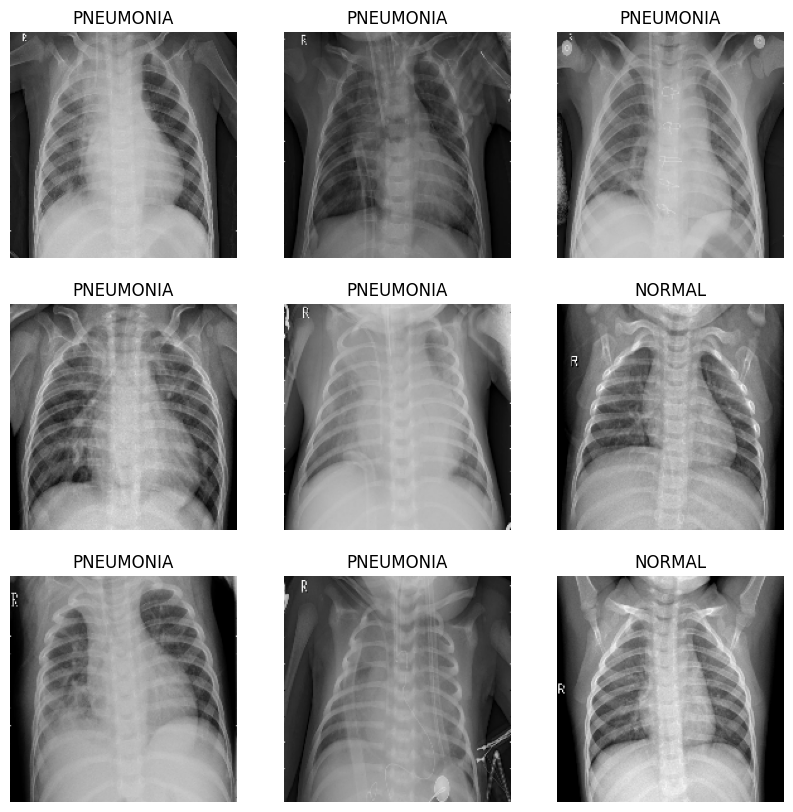

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle =True,
    image_size=IMAGE_SIZE,
    batch_size=32,
    validation_split=False
)
data_category = data_train.class_names # storing the class names

plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

## Building the CNN model

### Initialising the CNN

In [8]:
cnn_model = Sequential()

### Adding a convolutional layer

In [9]:
cnn_model.add(layers.Conv2D(filters = 32, kernel_size =3, padding='same', activation='relu'))

### Pooling

In [10]:
cnn_model.add(layers.MaxPool2D())

### Adding a Second convolutional layer

In [11]:
cnn_model.add(layers.Conv2D(filters = 64, kernel_size =3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPool2D())

### Adding a Third convolutional layer

In [12]:
cnn_model.add(layers.Conv2D(filters = 128, kernel_size =3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPool2D())

### Flattening

In [13]:
cnn_model.add(layers.Flatten())

### Full Connection

In [14]:
cnn_model.add(layers.Dense(units=512, activation='relu'))
cnn_model.add(layers.Dropout(0.5))

### Output Layer

In [15]:
cnn_model.add(layers.Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN model

In [16]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.7756 - loss: 0.6288 - val_accuracy: 0.6908 - val_loss: 0.8953
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.4354
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8205 - loss: 0.3829 - val_accuracy: 0.7730 - val_loss: 0.4587
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3079
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8619 - loss: 0.3072 - val_accuracy: 0.8405 - val_loss: 0.3576
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0641
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8837 - loss: 0.2643 - val_accuracy: 0.8487 - val_loss: 0.3586
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.0000

### Checking the Accuracy of the Model

In [18]:
loss, accuracy = cnn_model.evaluate(test_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step - accuracy: 0.8677 - loss: 0.3271
Validation Loss: 0.37120944261550903
Validation Accuracy: 0.8477563858032227


### Making a single prediction

In [19]:
from tensorflow.keras.preprocessing import image

img_path = './Dataset/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

In [20]:
# Make prediction
prediction = cnn_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [21]:
# Output prediction
print("Predicted class:", data_category[int(np.round(prediction[0][0]))])

Predicted class: PNEUMONIA


### Saving the Model

In [23]:
# cnn_model.save("pneumonia_detection_model.keras")